In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/nypd-complain-data/NYPD_Complaint_Data_Historic.csv")
print(f"Dataset shape: {df.shape}")

Dataset shape: (9491946, 35)


In [3]:
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False)[:10])

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9491946 entries, 0 to 9491945
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         object 
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  int64  
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP

In [6]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,39468181,02/20/2008,07:00:00,02/23/2008,08:00:00,88.0,02/23/2008,107,BURGLARY,221.0,...,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F
1,50539499,08/21/2008,22:00:00,08/21/2008,23:00:00,19.0,08/22/2008,109,GRAND LARCENY,438.0,...,(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F
2,45223390,04/03/2008,03:35:00,04/03/2008,03:50:00,77.0,04/03/2008,106,FELONY ASSAULT,109.0,...,(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F
3,50594658,08/19/2008,09:00:00,NaN,(null),32.0,08/27/2008,341,PETIT LARCENY,349.0,...,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M
4,44451016,03/10/2008,22:00:00,03/10/2008,22:10:00,67.0,03/11/2008,105,ROBBERY,397.0,...,M,NaN,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,M


In [7]:
df.describe()

,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,9.491175e+06,9.491946e+06,9.483971e+06,9.491946e+06,9.491471e+06,9.491471e+06,225224.000000,9.491467e+06,9.491467e+06
mean,6.338950e+01,2.974735e+02,4.129365e+02,6.749072e-01,1.004983e+06,2.072395e+05,14.100242,4.073535e+01,-7.392495e+01
std,3.462878e+01,1.525259e+02,2.189125e+02,6.422003e+00,2.153669e+04,3.032629e+04,12.561405,1.062969e-01,1.428014e-01
min,1.000000e+00,1.010000e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,-7.425495e+01
25%,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,9.916820e+05,1.845990e+05,3.000000,4.067331e+01,-7.397324e+01
50%,6.300000e+01,3.410000e+02,3.610000e+02,0.000000e+00,1.004456e+06,2.063150e+05,11.000000,4.073291e+01,-7.392706e+01
75%,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,1.016926e+06,2.351530e+05,30.000000,4.081211e+01,-7.388207e+01
max,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,1.067306e+06,2.719090e+05,34.000000,4.091296e+01,0.000000e+00


In [11]:
for column in df.columns:
    missing_pct = (df[column].isna().sum() * 100 / len(df))
    print(f"{column}: {missing_pct:.2f}%")

CMPLNT_NUM: 0.00%
CMPLNT_FR_DT: 0.01%
CMPLNT_FR_TM: 0.00%
CMPLNT_TO_DT: 19.47%
CMPLNT_TO_TM: 0.00%
ADDR_PCT_CD: 0.01%
RPT_DT: 0.00%
KY_CD: 0.00%
OFNS_DESC: 0.00%
PD_CD: 0.08%
PD_DESC: 0.00%
CRM_ATPT_CPTD_CD: 0.00%
LAW_CAT_CD: 0.00%
BORO_NM: 0.00%
LOC_OF_OCCUR_DESC: 0.00%
PREM_TYP_DESC: 0.00%
JURIS_DESC: 0.00%
JURISDICTION_CODE: 0.00%
PARKS_NM: 0.00%
HADEVELOPT: 0.00%
HOUSING_PSA: 5.71%
X_COORD_CD: 0.01%
Y_COORD_CD: 0.01%
SUSP_AGE_GROUP: 0.00%
SUSP_RACE: 0.00%
SUSP_SEX: 0.00%
TRANSIT_DISTRICT: 97.63%
Latitude: 0.01%
Longitude: 0.01%
Lat_Lon: 0.01%
PATROL_BORO: 0.00%
STATION_NAME: 0.00%
VIC_AGE_GROUP: 0.00%
VIC_RACE: 0.00%
VIC_SEX: 0.00%


In [12]:
cols_to_drop = ['PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'TRANSIT_DISTRICT', 'STATION_NAME']
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped {len(cols_to_drop)} columns")

Dropped 5 columns


In [14]:
redundant_cols = ['KY_CD', 'RPT_DT', 'PD_DESC', 'PD_CD', 'PATROL_BORO', 'X_COORD_CD', 'Y_COORD_CD', 'Lat_Lon']
df.drop(columns=redundant_cols, inplace=True)
print(f"Dropped {len(redundant_cols)} redundant columns")

Dropped 8 redundant columns


In [20]:
initial_len = len(df)
df = df[df['Latitude'].notna() & df['Longitude'].notna()]
print(f"Removed {initial_len - len(df)} rows without coordinates")

Removed 479 rows without coordinates


In [22]:
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')
df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM'], errors='coerce')

In [23]:
df = df[df['CMPLNT_FR_DT'].notna() & df['CMPLNT_FR_TM'].notna()]
print(f"Remaining rows: {len(df)}")

Remaining rows: 9490567


In [24]:
df['year'] = df['CMPLNT_FR_DT'].dt.year
df['month'] = df['CMPLNT_FR_DT'].dt.month
df['day'] = df['CMPLNT_FR_DT'].dt.day
df['hour'] = df['CMPLNT_FR_TM'].dt.hour
df['weekday'] = df['CMPLNT_FR_DT'].dt.day_name()

In [25]:
df.drop(columns=['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM'], inplace=True)

In [27]:
df['VIC_RACE'] = df['VIC_RACE'].fillna('UNKNOWN')
df['VIC_SEX'] = df['VIC_SEX'].fillna('U')
df['VIC_AGE_GROUP'] = df['VIC_AGE_GROUP'].fillna('UNKNOWN')
valid_ages = ['UNKNOWN', '25-44', '<18', '45-64', '65+', '18-24']
df.loc[~df['SUSP_AGE_GROUP'].isin(valid_ages), 'SUSP_AGE_GROUP'] = 'UNKNOWN'
df.loc[~df['VIC_AGE_GROUP'].isin(valid_ages), 'VIC_AGE_GROUP'] = 'UNKNOWN'
df['BORO_NM'] = df['BORO_NM'].fillna('UNKNOWN')
df['LOC_OF_OCCUR_DESC'] = df['LOC_OF_OCCUR_DESC'].fillna('UNKNOWN')

In [28]:
df.dropna(inplace=True)
print(f"Final dataset size: {len(df)}")

Final dataset size: 9490262


In [29]:
prop = ['BURGLARY', 'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY', 'THEFT-FRAUD', 
        'GRAND LARCENY OF MOTOR VEHICLE', 'FORGERY', 'JOSTLING', 'ARSON',
        'PETIT LARCENY OF MOTOR VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
        "BURGLAR'S TOOLS", 'FRAUDS', 'POSSESSION OF STOLEN PROPERTY',
        'CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES INVOLVING FRAUD',
        'FRAUDULENT ACCOSTING', 'THEFT OF SERVICES']

sexual = ['SEX CRIMES', 'HARRASSMENT 2', 'RAPE', 'PROSTITUTION & RELATED OFFENSES',
          'FELONY SEX CRIMES', 'LOITERING/DEVIATE SEX']

drug_alch = ['DANGEROUS DRUGS', 'INTOXICATED & IMPAIRED DRIVING',
             'ALCOHOLIC BEVERAGE CONTROL LAW', 'INTOXICATED/IMPAIRED DRIVING',
             'UNDER THE INFLUENCE OF DRUGS', 'LOITERING FOR DRUG PURPOSES']

personal = ['ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
            'OFFENSES AGAINST THE PERSON', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
            'HOMICIDE-NEGLIGENT-VEHICLE', 'KIDNAPPING & RELATED OFFENSES',
            'ENDAN WELFARE INCOMP', 'OFFENSES RELATED TO CHILDREN',
            'CHILD ABANDONMENT/NON SUPPORT', 'KIDNAPPING', 'DANGEROUS WEAPONS',
            'MURDER & NON-NEGL. MANSLAUGHTER', 'UNLAWFUL POSS. WEAP. ON SCHOOL']

admin = ['OFF. AGNST PUB ORD SENSBLTY &', 'CRIMINAL TRESPASS', 
         'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST PUBLIC ADMINI',
         'ADMINISTRATIVE CODE', 'OFFENSES AGAINST PUBLIC SAFETY',
         'LOITERING/GAMBLING (CARDS, DIC', 'DISORDERLY CONDUCT',
         'NEW YORK CITY HEALTH CODE', 'DISRUPTION OF A RELIGIOUS SERV',
         'LOITERING', 'ADMINISTRATIVE CODES']

conditions = [
    df['OFNS_DESC'].isin(prop),
    df['OFNS_DESC'].isin(sexual),
    df['OFNS_DESC'].isin(drug_alch),
    df['OFNS_DESC'].isin(personal),
    df['OFNS_DESC'].isin(admin)
]
categories = ['PROPERTY', 'SEXUAL', 'DRUGS/ALCOHOL', 'PERSONAL', 'ADMINISTRATIVE']
df['CRIME_CATEGORY'] = np.select(conditions, categories, default='OTHER')


In [33]:
df = df.rename(columns={
    'LAW_CAT_CD': 'CRIME_CLASS',
    'LOC_OF_OCCUR_DESC': 'OCCURENCE',
    'CRM_ATPT_CPTD_CD': 'COMPLETED',
    'OFNS_DESC': 'ORIGINAL_OFNS'
})

column_order = ['CMPLNT_NUM', 'year', 'month', 'day', 'weekday', 'hour', 
                'Latitude', 'Longitude', 'COMPLETED', 'CRIME_CATEGORY',
                'ADDR_PCT_CD', 'CRIME_CLASS', 'BORO_NM', 'PREM_TYP_DESC',
                'OCCURENCE', 'JURIS_DESC', 'JURISDICTION_CODE',
                'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
                'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']
df = df[column_order]

In [35]:
df.head()

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,COMPLETED,CRIME_CATEGORY,...,PREM_TYP_DESC,OCCURENCE,JURIS_DESC,JURISDICTION_CODE,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,39468181,2008,2,20,Wednesday,7,40.692464,-73.972708,COMPLETED,PROPERTY,...,RESIDENCE - APT. HOUSE,INSIDE,N.Y. POLICE DEPT,0,UNKNOWN,UNKNOWN,(null),25-44,WHITE,F
1,50539499,2008,8,21,Thursday,22,40.771341,-73.953418,COMPLETED,PROPERTY,...,BAR/NIGHT CLUB,FRONT OF,N.Y. POLICE DEPT,0,UNKNOWN,(null),(null),45-64,WHITE HISPANIC,F
2,45223390,2008,4,3,Thursday,3,40.671245,-73.926713,COMPLETED,PERSONAL,...,RESIDENCE - PUBLIC HOUSING,INSIDE,N.Y. HOUSING POLICE,2,UNKNOWN,(null),(null),25-44,BLACK,F
3,50594658,2008,8,19,Tuesday,9,40.813412,-73.943226,COMPLETED,PROPERTY,...,STREET,FRONT OF,N.Y. POLICE DEPT,0,UNKNOWN,UNKNOWN,(null),UNKNOWN,UNKNOWN,M
4,44451016,2008,3,10,Monday,22,40.650142,-73.944674,COMPLETED,PROPERTY,...,STREET,FRONT OF,N.Y. POLICE DEPT,0,<18,BLACK,M,25-44,BLACK,M


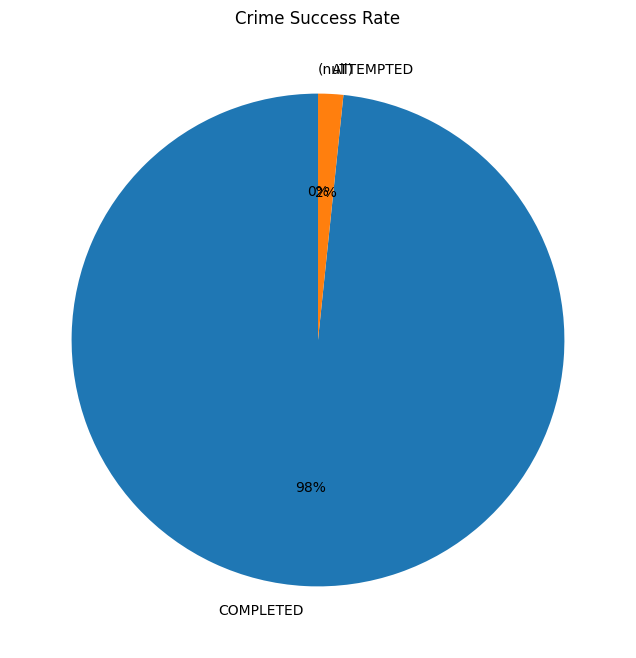

In [36]:
plt.figure(figsize=(8, 8))
df['COMPLETED'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', startangle=90)
plt.title('Crime Success Rate')
plt.ylabel('')
plt.show()

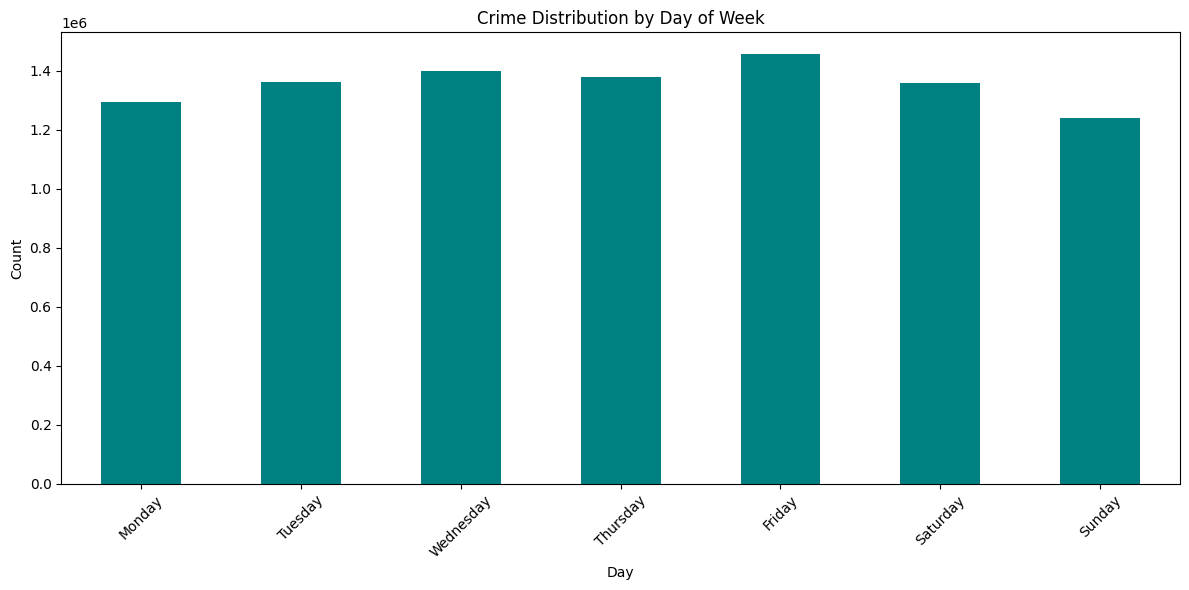

In [38]:
plt.figure(figsize=(12, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['weekday'].value_counts()[weekday_order]
weekday_counts.plot(kind='bar', color='teal')
plt.title('Crime Distribution by Day of Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

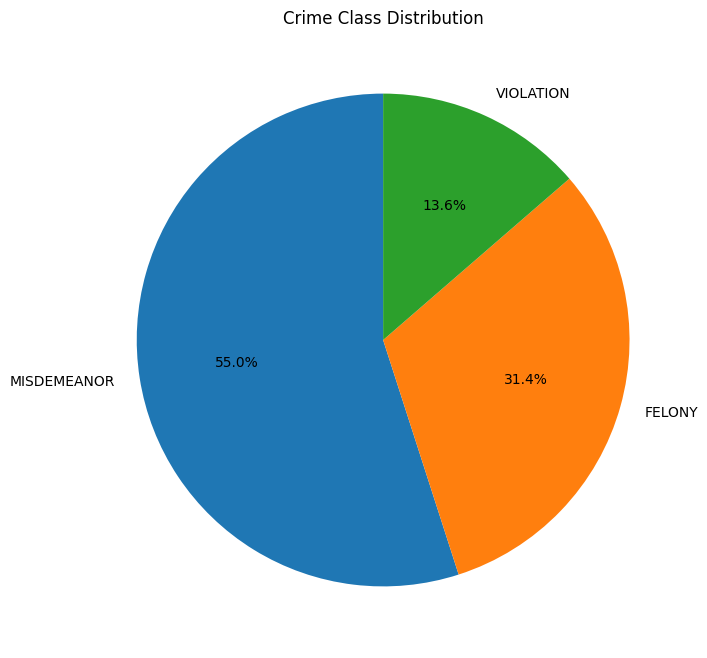

In [39]:
plt.figure(figsize=(8, 8))
df['CRIME_CLASS'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Crime Class Distribution')
plt.ylabel('')
plt.show()

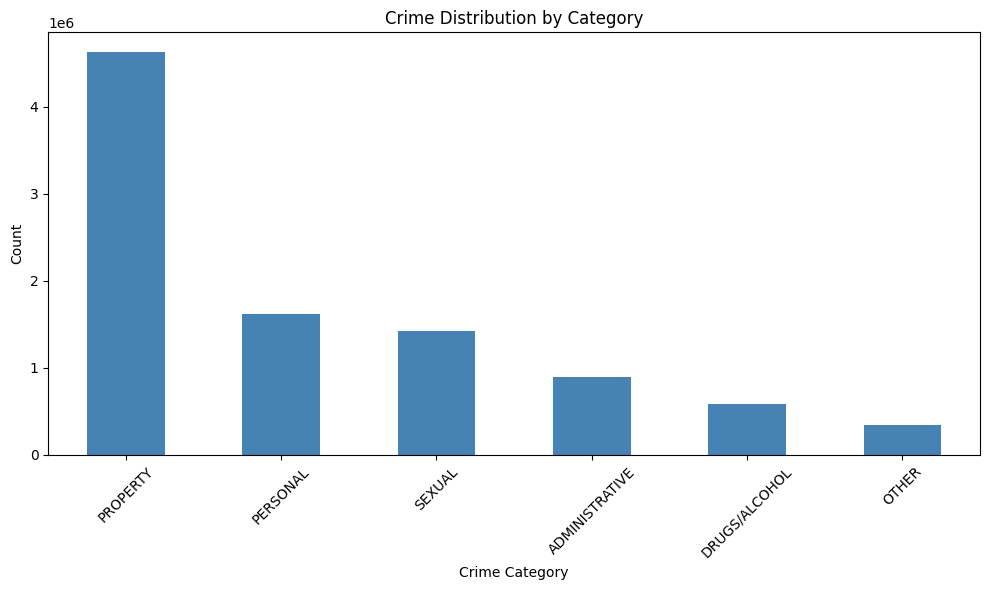

In [40]:
plt.figure(figsize=(10, 6))
df['CRIME_CATEGORY'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Crime Distribution by Category')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

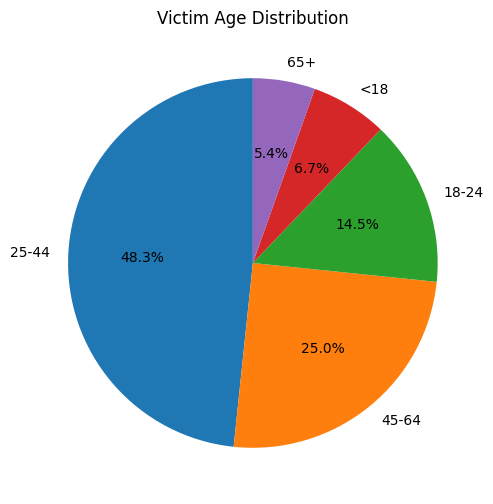

In [42]:
filtered_vic = df[df['VIC_AGE_GROUP'] != 'UNKNOWN']
plt.figure(figsize=(10, 6))
filtered_vic['VIC_AGE_GROUP'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Victim Age Distribution')
plt.ylabel('')
plt.show()

In [45]:
df.to_csv('nypd_cleaned.csv', index=False)
print("Dataset saved successfully!")

Dataset saved successfully!
